In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train_data = pd.read_csv('_train.csv')
x_test_data = pd.read_csv('_test.csv')

In [3]:
train_data.shape[0]

42000

In [4]:
x_train_data = train_data.drop('label', axis=1)

In [5]:
x_train_data.shape

(42000, 784)

In [6]:
y_train_data = train_data['label']

In [7]:
y_train_data.shape

(42000,)

In [8]:
x_test_data.shape

(28000, 784)

In [9]:
x_train = x_train_data.values
x_test = x_test_data.values

In [10]:
x_train.shape

(42000, 784)

In [11]:
x_test.shape

(28000, 784)

In [12]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (42000, 28, 28, 1)
x_test shape: (28000, 28, 28, 1)
Number of images in x_train 42000
Number of images in x_test 28000


In [13]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [15]:
y_train_data.shape

(42000,)

In [16]:
x_train.shape

(42000, 28, 28, 1)

In [17]:
from keras.utils import to_categorical
y_train_data = to_categorical(y_train_data)

In [18]:
y_train_data.shape

(42000, 10)

In [37]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train_data[:10000]
partial_y_train = y_train_data[10000:]

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

history = model.fit(x=x_train,y=y_train_data, epochs=10, batch_size=64, validation_data=(x_val, y_val), verbose=1)

Epoch 1/10
657/657 [==============================] - 60s 88ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.0017 - val_accuracy: 0.9994
Epoch 2/10
657/657 [==============================] - 59s 89ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 8.7769e-04 - val_accuracy: 0.9997
Epoch 3/10
657/657 [==============================] - 57s 87ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0016 - val_accuracy: 0.9994
Epoch 4/10
657/657 [==============================] - 58s 88ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 4.4120e-04 - val_accuracy: 0.9998
Epoch 5/10
657/657 [==============================] - 56s 85ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 6/10
657/657 [==============================] - 56s 85ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0023 - val_accuracy: 0.9994
Epoch 7/10
657/657 [==============================] - 57s 86ms/step - loss: 8.7111e-04 - accuracy: 0.9997 - val_loss: 0.0015 - v

In [40]:
model.evaluate(x_train, y_train_data)

1313/1313 [==============================] - 23s 17ms/step - loss: 5.0226e-04 - accuracy: 0.9998


[0.0005022633704356849, 0.9997618794441223]

In [41]:
predictions = model.predict(x_test)

875/875 [==============================] - 15s 17ms/step


In [42]:
predictions = pd.DataFrame(predictions)
result = np.argmax(pred, axis=1)
result = pd.DataFrame(result)
result.head()

,0
0,2
1,0
2,9
3,9
4,3


In [43]:
df_test = pd.read_csv('sample_submission.csv')
df_test = pd.concat([df_test, result],axis=1)
df_test = df_test.drop(columns=['Label'])
df_test = df_test.rename(columns = {0:'Label'})
df_test = df_test[['ImageId', 'Label']]
df_test

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [44]:
df_test.to_csv('submission.csv', index=False)

In [45]:
# predictions = []

# for i in range(len(x_test)):
#     pred = model.predict(x_test[i].reshape(1, 28, 28, 1), verbose=0)
#     predictions.append(np.argmax(pred))
#     print(f"Writing line: {len(predictions)}/28000, {((len(predictions))/28000)*100:.3f}% is done.")

# resultlist = []
# #itemid = 0

# for i in range(len(x_test)):
#     pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
#     #print(*pred, sep = "\n")
#     resultlist.append(np.argmax(pred))
#     #itemid.append(itemid+1)
#     #print(np.argmax(pred))

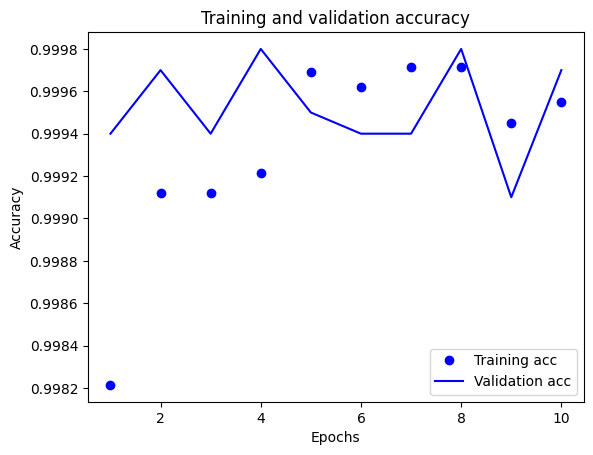

In [46]:
history_dict = history.history
history_dict.keys()


plt.clf()   # clear figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [47]:
# import csv

# resultlist
# csvfile = "result.csv"

# #Assuming res is a flat list
# with open(csvfile, "w") as output:
#     writer = csv.writer(output, lineterminator='\n')
#     for val in resultlist:
#         writer.writerow([val])

# # another way
# submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
#                          "Label": predictions})
# submissions.to_csv("DR.csv", index=False, header=True)